In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import os
from PIL import Image
# Caminho para o dataset
dataset_path = "/content/dataset"


# Função para verificar imagens
def verify_images(dataset_path):
    valid_images = []
    invalid_images = []
    for subdir, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verifica a imagem
                valid_images.append(file_path)
            except (IOError, SyntaxError):
                invalid_images.append(file_path)
    return valid_images, invalid_images

# Verificar imagens no dataset
valid_images, invalid_images = verify_images(dataset_path)

# Imprimir resultados
print(f"Imagens válidas: {len(valid_images)}")
print(f"Imagens inválidas: {len(invalid_images)}")

# Opcional: remover imagens inválidas
for invalid_image in invalid_images:
    os.remove(invalid_image)


# Geradores de dados (Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Carregar MobileNetV2 sem a última camada
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights="imagenet")

# Congelar camadas para manter o aprendizado prévio
for layer in base_model.layers:
    layer.trainable = False

# Adicionar novas camadas
x = Flatten()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_generator, validation_data=val_generator, epochs=20)

Imagens válidas: 102
Imagens inválidas: 5
Found 84 images belonging to 7 classes.
Found 18 images belonging to 7 classes.
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.2420 - loss: 2.5729 - val_accuracy: 0.2778 - val_loss: 2.0996
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1933 - loss: 2.6575 - val_accuracy: 0.3889 - val_loss: 1.7904
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4433 - loss: 1.8426 - val_accuracy: 0.2778 - val_loss: 1.5953
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 902ms/step - accuracy: 0.5238 - loss: 1.4109 - val_accuracy: 0.3333 - val_loss: 1.8072
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 837ms/step - accuracy: 0.5866 - loss: 1.5525 - val_accuracy: 0.4444 - val_loss: 1.2706
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 957ms/step - accuracy: 0.6533 - loss: 1.0355 - val_accuracy: 0.5000 - val_loss: 1.1241
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7206 - loss: 0.8126 - val_accuracy: 0.5000 - val_loss: 1.3155
Epoch 8

In [30]:
model.save("himym_face_recognition.h5")

In [31]:
model = tf.keras.models.load_model("himym_face_recognition.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


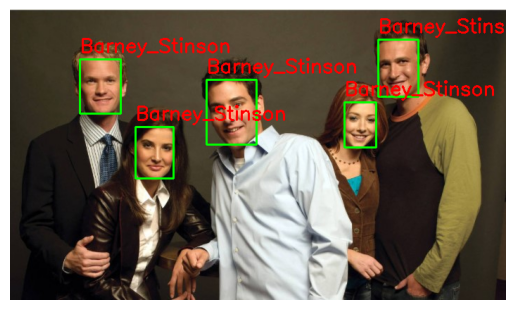

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


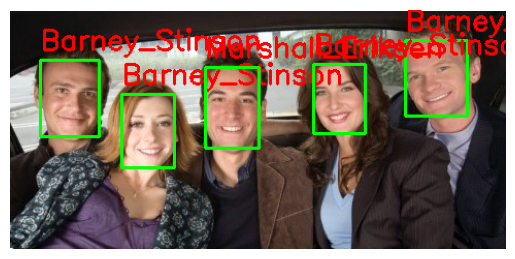

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


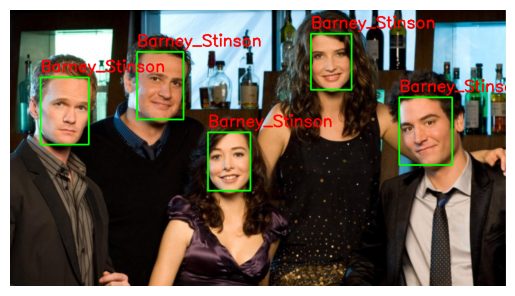

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


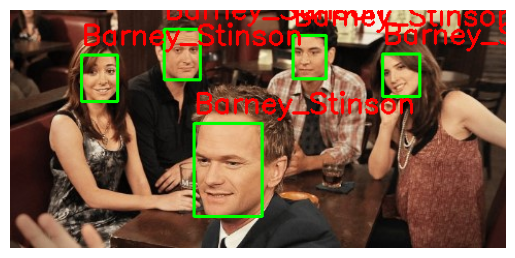

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


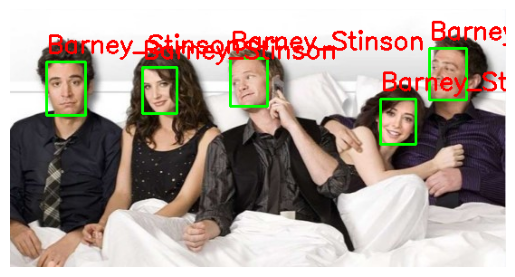

In [34]:
from mtcnn import MTCNN
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar o modelo treinado
model = tf.keras.models.load_model("himym_face_recognition.h5")

# Dicionário de classes
class_labels = list(train_generator.class_indices.keys())

# Inicializar detector de faces
detector = MTCNN()

def recognize_faces(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(image_rgb)

    for face in faces:
        x, y, width, height = face["box"]
        face_img = image_rgb[y:y + height, x:x + width]  # Recortar face
        face_img = cv2.resize(face_img, (160, 160)) / 255.0  # Normalizar
        face_img = np.expand_dims(face_img, axis=0)

        prediction = model.predict(face_img)
        class_index = np.argmax(prediction)
        label = class_labels[class_index]

        # Adicionar texto e desenhar caixa ao redor da face
        cv2.putText(image_rgb, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)

    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

import os

test_images_path = "dataset/test_images/"

# Percorre todas as imagens na pasta e processa cada uma
for img_name in os.listdir(test_images_path):
    img_path = os.path.join(test_images_path, img_name)
    recognize_faces(img_path)

In [26]:
!pip install beautifulsoup4 requests


In [33]:
import os
import requests
from bs4 import BeautifulSoup

# Função para baixar as imagens
def download_images(url, save_folder):
    # Fazer a requisição à página
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Encontrar todas as tags <img> e extrair as URLs das imagens
    img_tags = soup.find_all("img")
    img_urls = [img["src"] for img in img_tags if "src" in img.attrs]

    # Criar a pasta para salvar as imagens, se não existir
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    for i, img_url in enumerate(img_urls):
        try:
            # Ajustar URLs relativas para absolutas, se necessário
            if not img_url.startswith('http'):
                img_url = url + img_url
            img_data = requests.get(img_url).content
            img_name = os.path.join(save_folder, f"image_{i + 1}.jpg")
            with open(img_name, 'wb') as file:
                file.write(img_data)
            print(f"Imagem {i + 1} salva com sucesso em {save_folder}.")
        except Exception as e:
            print(f"Erro ao baixar a imagem {i + 1}: {e}")

# Função para baixar as imagens de cada personagem
def download_character_images(character_name, url):
    # Criar uma pasta com o nome do personagem
    save_folder = f"dataset/{character_name.replace(' ', '_')}"

    # Baixar as imagens
    download_images(url, save_folder)

# URLs de busca para cada personagem (ajuste se necessário)
character_urls = {
    "Robin Scherbatsky": "https://www.google.com/search?q=Robin+Scherbatsky+face+images&tbm=isch",
    "Barney Stinson": "https://www.google.com/search?q=Barney+Stinson+face+images&tbm=isch",
    "Ted Mosby": "https://www.google.com/search?q=Ted+Mosby+face+images&tbm=isch",
    "Lily Aldrin": "https://www.google.com/search?q=Lily+Aldrin+face+images&tbm=isch",
    "Marshall Eriksen": "https://www.google.com/search?q=Marshall+Eriksen+face+images&tbm=isch",
}


# Baixar as imagens de cada personagem
for character, url in character_urls.items():
    download_character_images(character, url)


Imagem 1 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 2 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 3 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 4 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 5 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 6 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 7 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 8 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 9 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 10 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 11 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 12 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 13 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 14 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 15 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 16 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 17 salva com sucesso em dataset/Robin_Scherbatsky.
Imagem 18 salva com suc